In [13]:
### 🔧 TAREA
#Explora el dataset e intenta responder:
#
#- ¿Qué variables tienen valores faltantes?
#- ¿Qué variables parecen más correlacionadas con el target?
#- ¿Hay valores extremos que deberías tratar?

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Configuración de estilo
sns.set(style="whitegrid")

In [16]:
# 📥 Cargar el dataset limpio
df = pd.read_csv("../data/credit_clean.csv")

# 👁️ Primer vistazo a los datos
df.head()

# 🧼 Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40016 entries, 0 to 40015
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      40016 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  40016 non-null  float64
 2   age                                   40016 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  40016 non-null  int64  
 4   DebtRatio                             40016 non-null  float64
 5   MonthlyIncome                         40016 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       40016 non-null  int64  
 7   NumberOfTimes90DaysLate               40016 non-null  int64  
 8   NumberRealEstateLoansOrLines          40016 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  40016 non-null  int64  
 10  NumberOfDependents                    40016 non-null  float64
dtypes: float64(4), 

Distribución del target:
SeriousDlqin2yrs
1    0.5002
0    0.4998
Name: proportion, dtype: float64


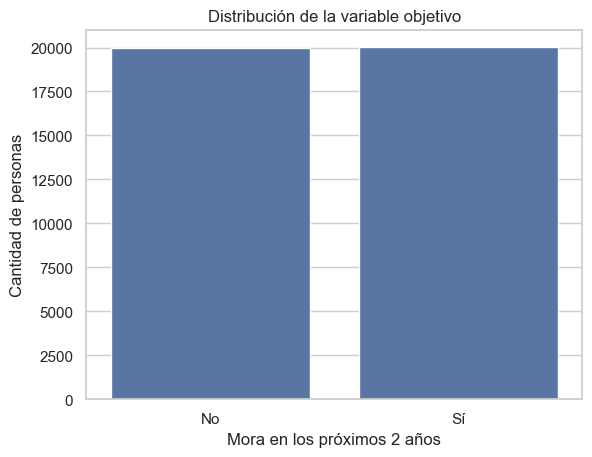

In [17]:
# 🔍 Distribución de la variable objetivo
target_counts = df["SeriousDlqin2yrs"].value_counts(normalize=True)
print("Distribución del target:")
print(target_counts)

sns.countplot(data=df, x="SeriousDlqin2yrs")
plt.title("Distribución de la variable objetivo")
plt.xlabel("Mora en los próximos 2 años")
plt.ylabel("Cantidad de personas")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

Al contrario del archivo original, el preprocesamiento nos balanceó la variable objetivo ademas de imputar datos en las columnas que tenian nulos

In [18]:
# 📊 Estadísticas descriptivas
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000,40016.000000
mean,0.500200,4.687565,49.267893,1.278888,331.312144,6057.155913,8.216263,1.055203,1.000925,0.920332,0.833742
std,0.500006,188.643899,14.293645,8.290821,2093.376551,6878.873207,5.400697,8.293279,1.267900,8.270203,1.165660
min,0.000000,0.000000,21.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.072469,39.000000,0.000000,0.182940,3550.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.441448,48.000000,0.000000,0.390770,5443.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.941515,59.000000,1.000000,0.868648,6812.750000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,29110.000000,101.000000,98.000000,326442.000000,699530.000000,57.000000,98.000000,29.000000,98.000000,9.000000


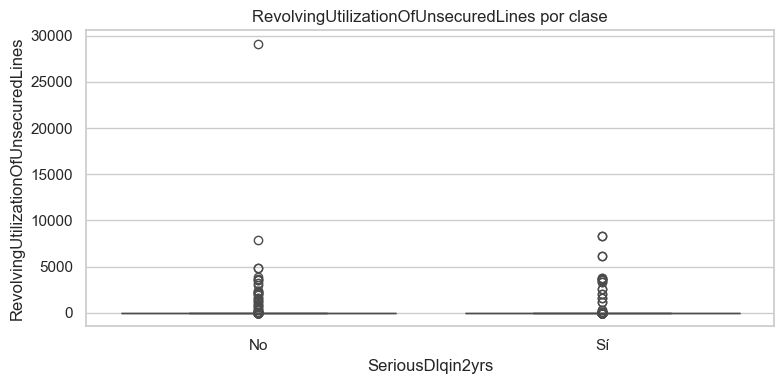

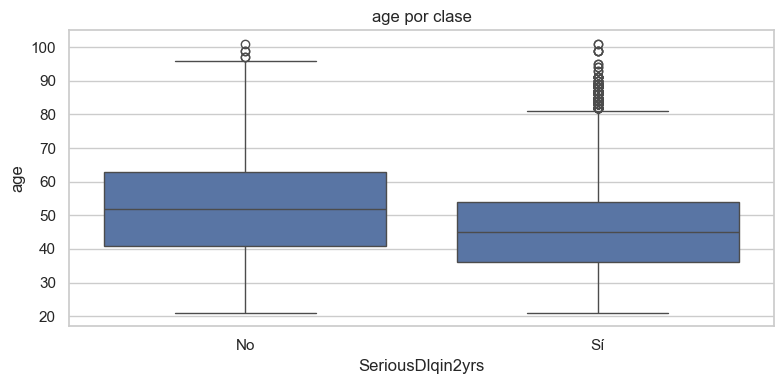

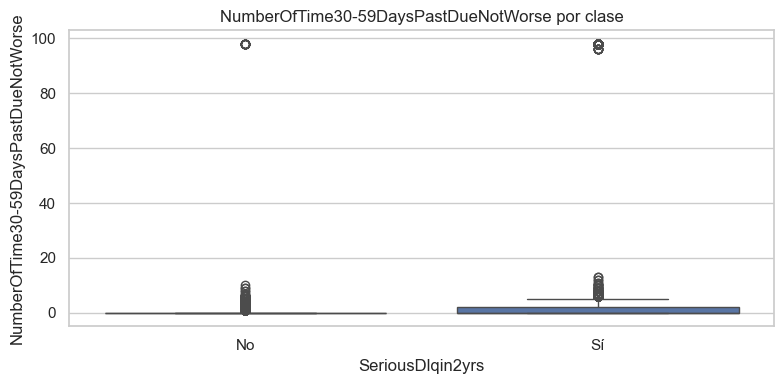

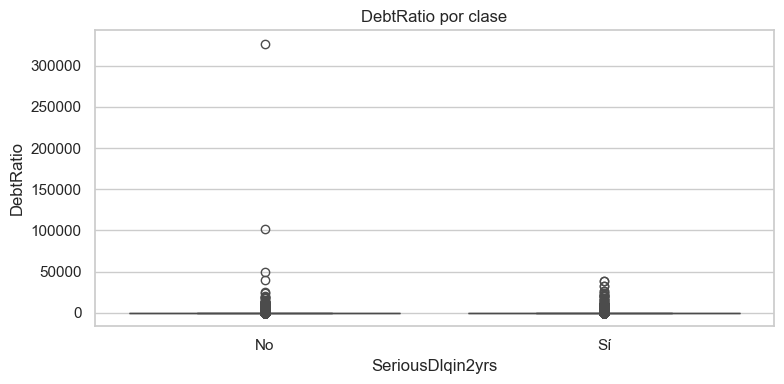

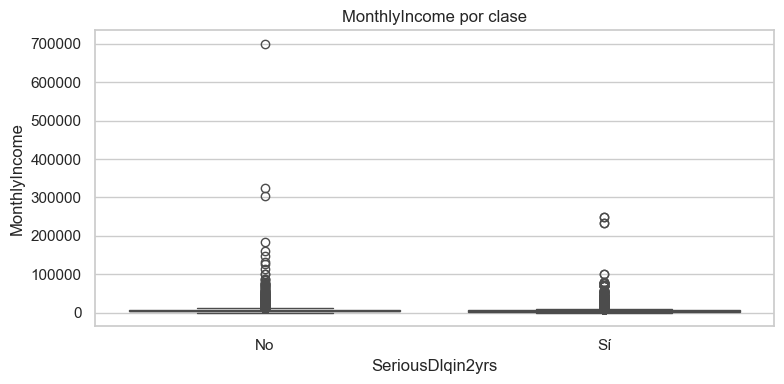

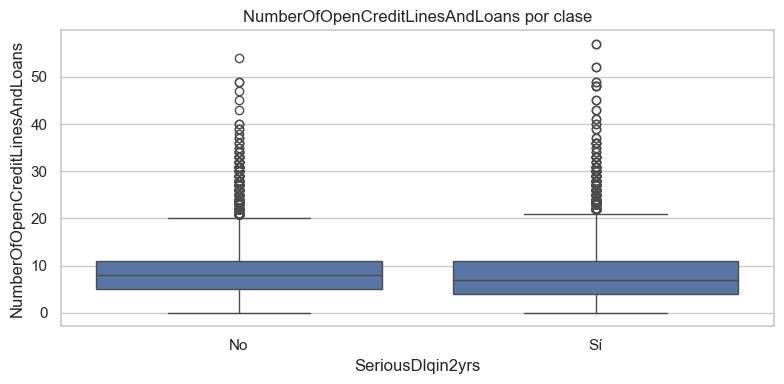

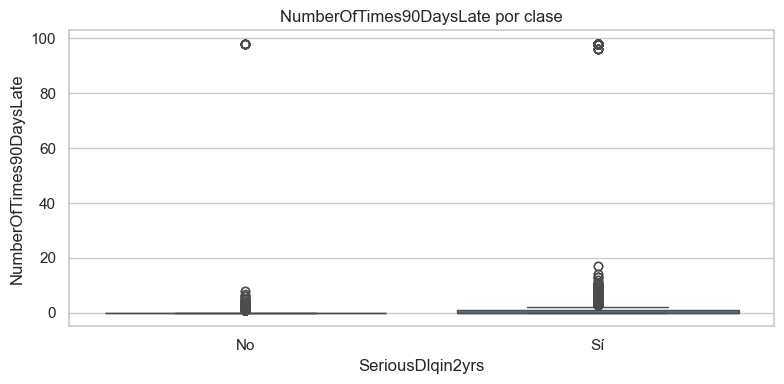

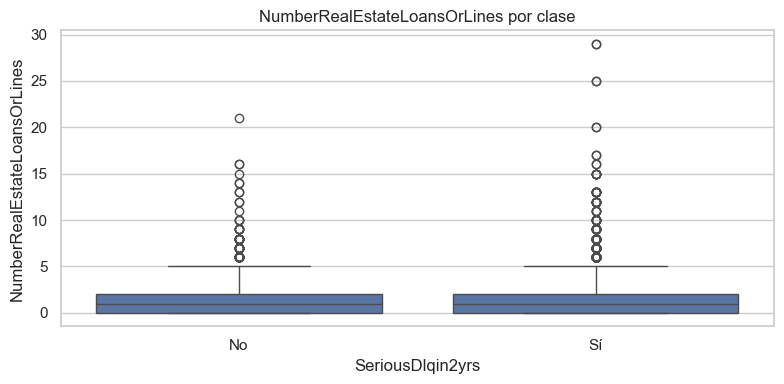

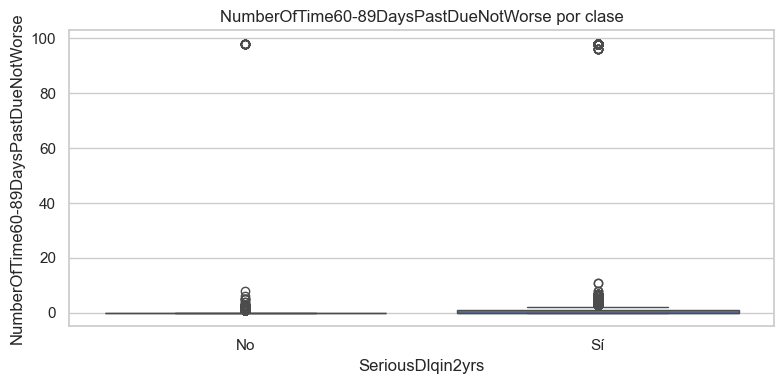

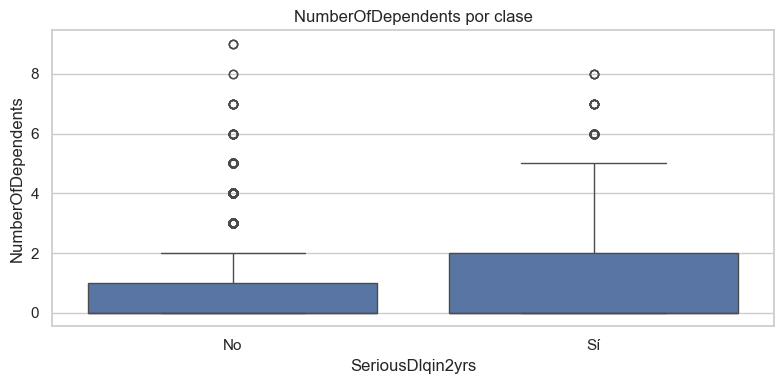

In [19]:
# 📉 Boxplots por variable numérica
for col in df.columns:
    if col != "SeriousDlqin2yrs":
        plt.figure(figsize=(8, 4))
        sns.boxplot(x="SeriousDlqin2yrs", y=col, data=df)
        plt.title(f"{col} por clase")
        plt.xticks([0, 1], ["No", "Sí"])
        plt.tight_layout()
        plt.show()

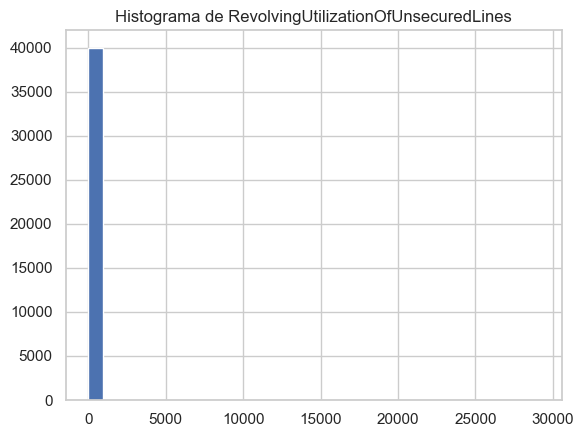

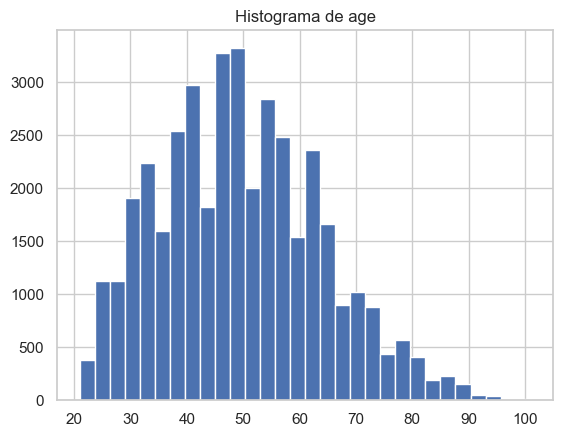

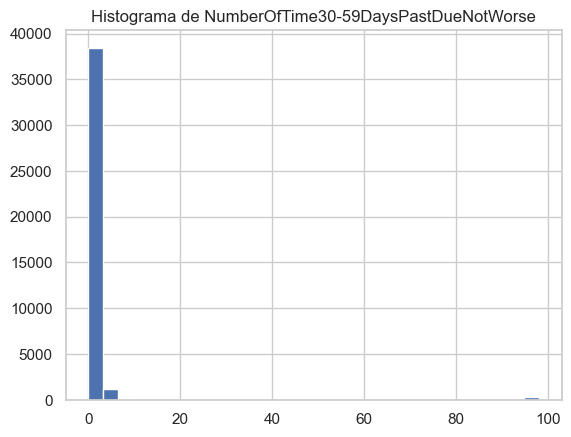

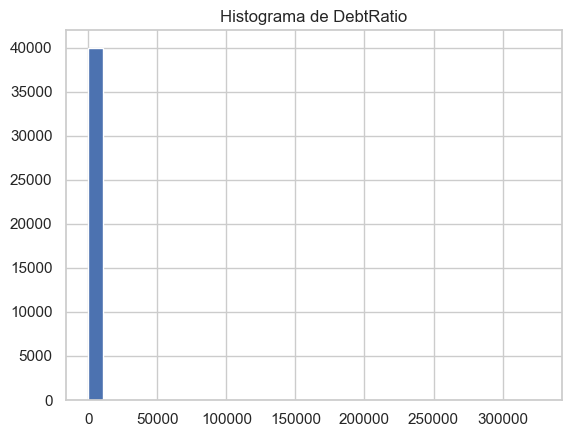

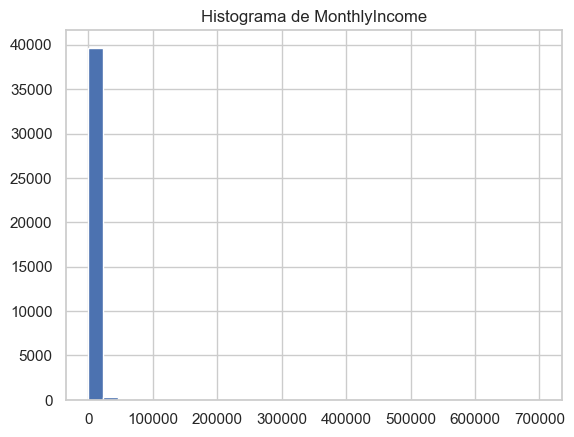

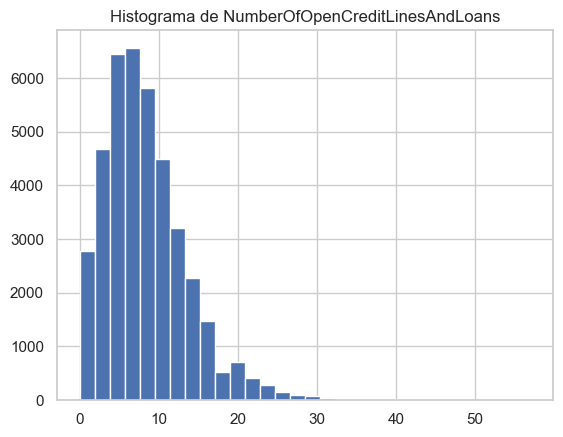

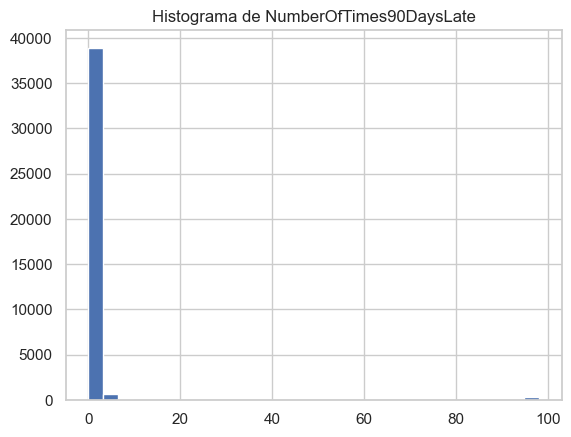

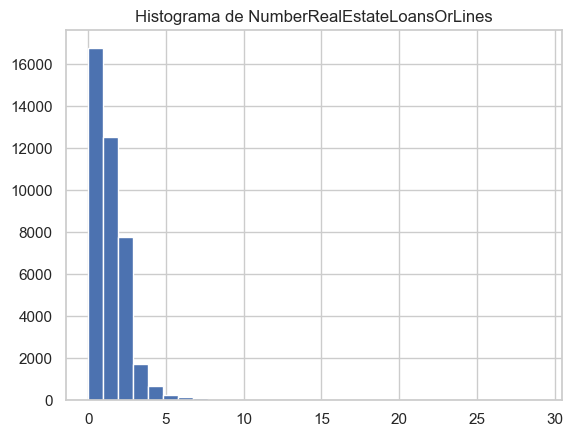

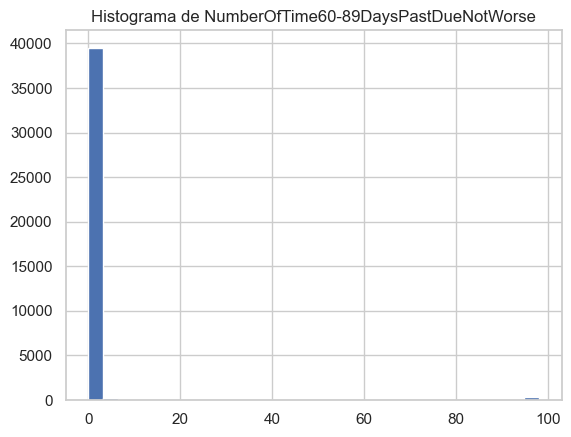

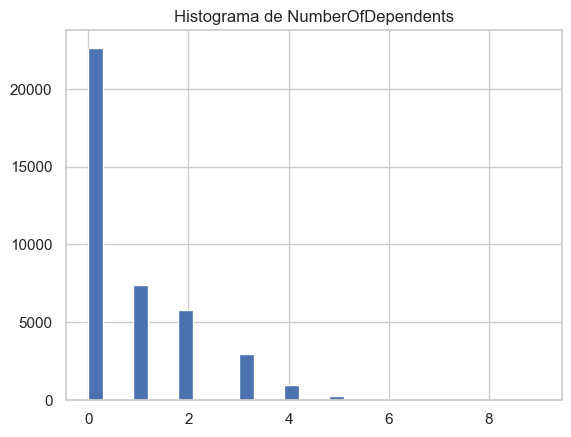

In [20]:
# 🧠 TODO: Agregar histograma por variable (para tarea)
for col in df.columns:
    if col != "SeriousDlqin2yrs":
        plt.hist(df[col], bins=30)
        plt.title(f"Histograma de {col}")
        plt.show()

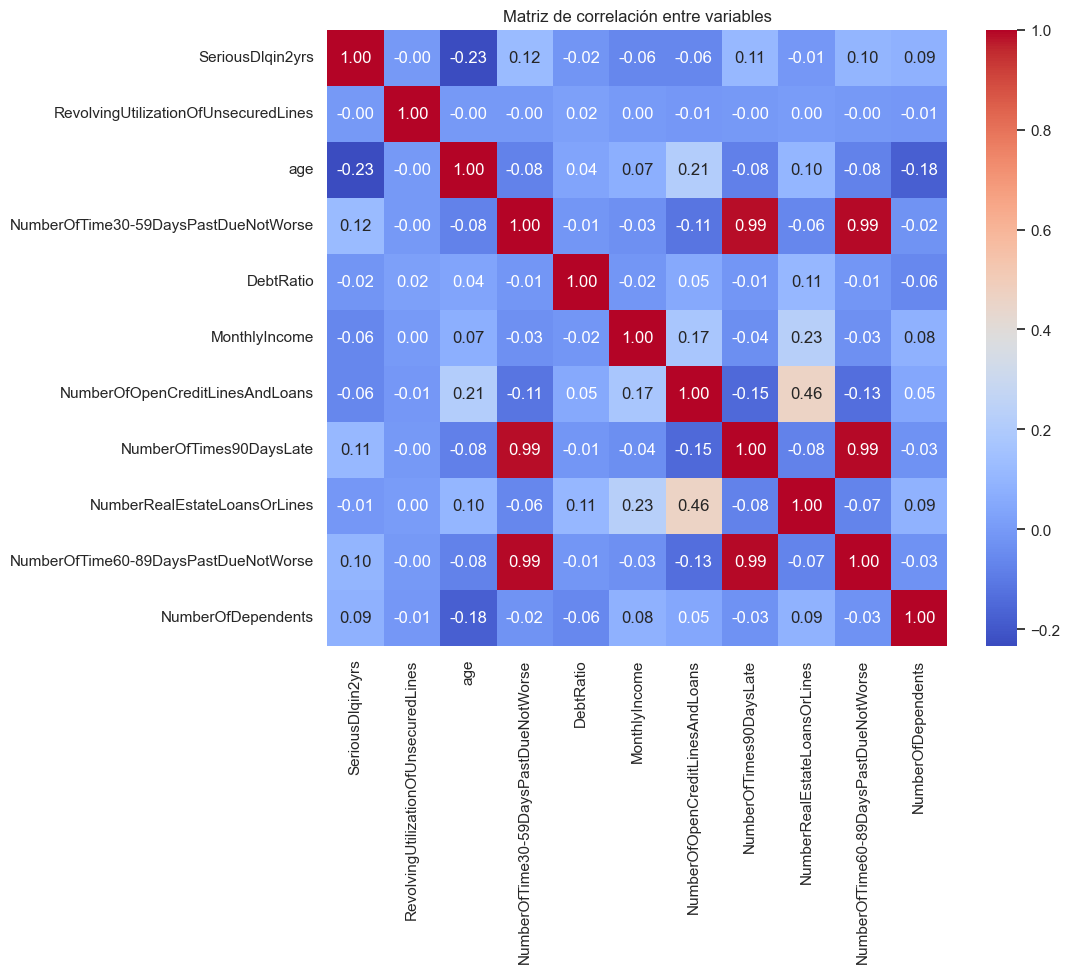

In [21]:
# 🔗 Mapa de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

La matriz de correlacion de las variables del archivo original, no cambia mucho respecto a la mariz del archivo limpio.

In [ ]:
# 📝 TODO: Identificar outliers o valores extremos (completar)
# - Analizar la columna RevolvingUtilizationOfUnsecuredLines
# - Verificar valores inusuales en MonthlyIncome o DebtRatio


Análisis de RevolvingUtilizationOfUnsecuredLines
count    40016.000000
mean         4.687565
std        188.643899
min          0.000000
25%          0.072469
50%          0.441448
75%          0.941515
max      29110.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64


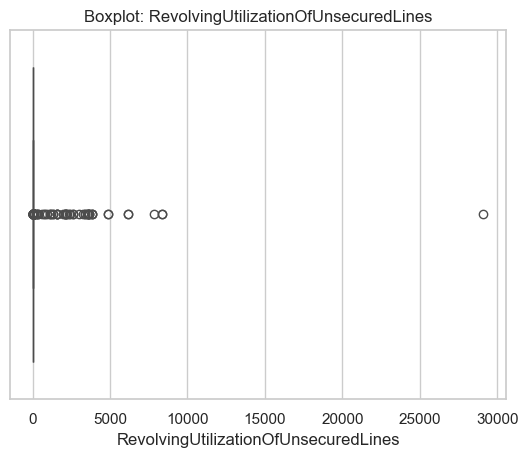


Valores mayores a 1 en RevolvingUtilizationOfUnsecuredLines: 2767 registros


In [27]:
# Análisis de outliers para 'RevolvingUtilizationOfUnsecuredLines'
print("\nAnálisis de RevolvingUtilizationOfUnsecuredLines")
print(df['RevolvingUtilizationOfUnsecuredLines'].describe())

# Visualización
sns.boxplot(x=df['RevolvingUtilizationOfUnsecuredLines'])
plt.title('Boxplot: RevolvingUtilizationOfUnsecuredLines')
plt.show()

# Valores mayores a 1 (es una proporción, debería estar entre 0 y 1 normalmente)
outliers_ru = df[df['RevolvingUtilizationOfUnsecuredLines'] > 1]
print(f"\nValores mayores a 1 en RevolvingUtilizationOfUnsecuredLines: {len(outliers_ru)} registros")


El campo está ```RevolvingUtilizationOfUnsecuredLines``` definido como ***Saldo total en tarjetas de crédito y líneas de crédito personales, excepto bienes raíces y deudas sin cuotas como los préstamos de autos, dividido por la suma de los límites de crédito*** y se refiere al indice de utilicacion de crédito, por lo que valores sobre 1 puede indicar un sobreendeudamiento de la persona.

Existen 2767 registros que son mayores a 1 en este campo.


Análisis de DebtRatio
count     40016.000000
mean        331.312144
std        2093.376551
min           0.000000
25%           0.182940
50%           0.390770
75%           0.868648
max      326442.000000
Name: DebtRatio, dtype: float64


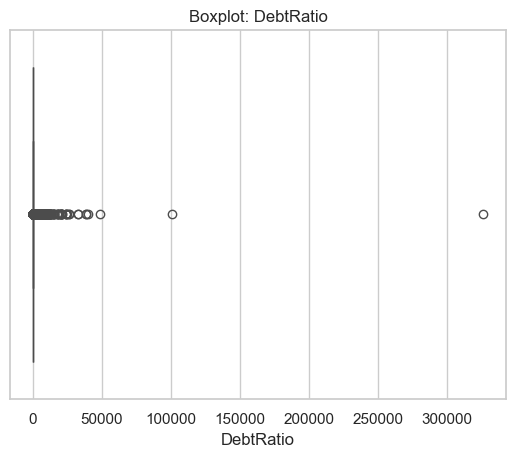


Registros con DebtRatio > 1: 9198 registros


In [28]:

# Análisis de 'DebtRatio'
print("\nAnálisis de DebtRatio")
print(df['DebtRatio'].describe())

sns.boxplot(x=df['DebtRatio'])
plt.title('Boxplot: DebtRatio')
plt.show()

# Considerar valores mayores a 1 como sospechosos si son muy numerosos
high_debt = df[df['DebtRatio'] > 1]
print(f"\nRegistros con DebtRatio > 1: {len(high_debt)} registros")



La definicion de ```DebtRatio ``` dice que ***Pagos mensuales de deuda, pensión alimenticia y costos de vida divididos por el ingreso bruto mensual.*** por lo que indica una relacion deuda-ingresos.  Valores mayores a 1 puede tambien indicar que son clientes con alta deuda o que el calculo de ese valor se vió afectado a algun error, por ejemplo una mala imputacion del parametro ```MonthlyIncome```


Análisis de MonthlyIncome
count     40016.000000
mean       6057.155913
std        6878.873207
min           1.000000
25%        3550.000000
50%        5443.000000
75%        6812.750000
max      699530.000000
Name: MonthlyIncome, dtype: float64


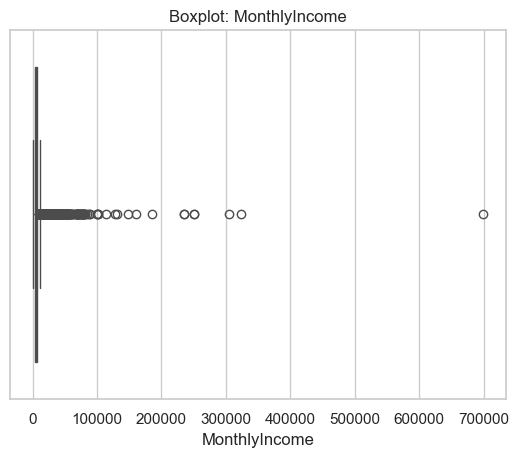


Outliers en MonthlyIncome (IQR): 2647 registros

Valores bajos: count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MonthlyIncome, dtype: float64

Valores altos: count      2647.000000
mean      19055.224405
std       21386.345846
min       11707.000000
25%       12833.000000
50%       14700.000000
75%       18383.000000
max      699530.000000
Name: MonthlyIncome, dtype: float64
-1344.125 11706.875


In [33]:
# Análisis de 'MonthlyIncome'
print("\nAnálisis de MonthlyIncome")
print(df['MonthlyIncome'].describe())

sns.boxplot(x=df['MonthlyIncome'])
plt.title('Boxplot: MonthlyIncome')
plt.show()

# Posibles outliers usando IQR
q1 = df['MonthlyIncome'].quantile(0.25)
q3 = df['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_income = df[(df['MonthlyIncome'] < lower_bound) | (df['MonthlyIncome'] > upper_bound)]
print(f"\nOutliers en MonthlyIncome (IQR): {len(outliers_income)} registros")
print(f"\nValores bajos: {df[df['MonthlyIncome'] < lower_bound]['MonthlyIncome'].describe()}")

print(f"\nValores altos: {df[df['MonthlyIncome'] > upper_bound]['MonthlyIncome'].describe()}")
print(lower_bound, upper_bound)



In [42]:
# Mostrar conteo de valores únicos de la variable 'MonthlyIncome'
print(df['MonthlyIncome'].value_counts().sort_index())

# Mostrar la moda y la media de 'MonthlyIncome'
print(f"Moda: {df['MonthlyIncome'].mode()[0]}")
print(f"Media: {df['MonthlyIncome'].mean()}")

# Cantidad de registros con MonthlyIncome menor a la moda
print(f"Cantidad de registros con MonthlyIncome menor a la moda: {len(df[df['MonthlyIncome'] < df['MonthlyIncome'].mode()[0]])}")

# Cantidad de registros con MonthlyIncome menor a la media
print(f"Cantidad de registros con MonthlyIncome menor a la media: {len(df[df['MonthlyIncome'] < df['MonthlyIncome'].mean()])}")



MonthlyIncome
1.0         116
2.0           1
4.0           2
5.0           1
10.0          2
           ... 
234600.0      2
250000.0      2
304000.0      1
324000.0      1
699530.0      1
Name: count, Length: 6602, dtype: int64
Moda: 5443.0
Media: 6057.155912634946
Cantidad de registros con MonthlyIncome menor a la moda: 18101
Cantidad de registros con MonthlyIncome menor a la media: 27899


De acuerdo al rango interquartilico para la variable ```MonthlyIncome```, existen 2647 registros que se considerarian outliers, pero al revisar los registros , se puede observar que existen valores muy bajos, sobre todo 116 registros con valor 1, por lo que se podrian considerar como un error en la imputacion de los datos


Análisis de MonthlyIncome
count     28669.000000
mean       6486.384073
std        7961.673862
min           1.000000
25%        3400.000000
50%        5250.000000
75%        7916.000000
max      699530.000000
Name: MonthlyIncome, dtype: float64


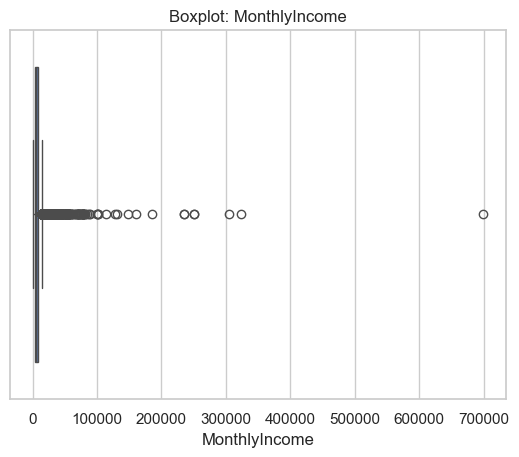


Outliers en MonthlyIncome (IQR): 1262 registros

Valores bajos: count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MonthlyIncome, dtype: float64

Valores altos: count      1262.000000
mean      25344.942948
std       29565.364861
min       14700.000000
25%       16036.500000
50%       18458.500000
75%       24666.000000
max      699530.000000
Name: MonthlyIncome, dtype: float64
-3374.0 14690.0


In [43]:
# Eliminar valores mayores que 1 en 'RevolvingUtilizationOfUnsecuredLines'
df = df[df['RevolvingUtilizationOfUnsecuredLines'] <= 1]

# Eliminar registros con DebtRatio mayor a 1
df = df[df['DebtRatio'] <= 1]


# Análisis de 'MonthlyIncome' después de eliminar valores extremos en 'RevolvingUtilizationOfUnsecuredLines' y 'DebtRatio'
print("\nAnálisis de MonthlyIncome")
print(df['MonthlyIncome'].describe())

sns.boxplot(x=df['MonthlyIncome'])
plt.title('Boxplot: MonthlyIncome')
plt.show()

# Posibles outliers usando IQR
q1 = df['MonthlyIncome'].quantile(0.25)
q3 = df['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_income = df[(df['MonthlyIncome'] < lower_bound) | (df['MonthlyIncome'] > upper_bound)]
print(f"\nOutliers en MonthlyIncome (IQR): {len(outliers_income)} registros")
print(f"\nValores bajos: {df[df['MonthlyIncome'] < lower_bound]['MonthlyIncome'].describe()}")

print(f"\nValores altos: {df[df['MonthlyIncome'] > upper_bound]['MonthlyIncome'].describe()}")
print(lower_bound, upper_bound)

In [44]:
# Eliminar outliers de MonthlyIncome
df = df[(df['MonthlyIncome'] >= lower_bound) & (df['MonthlyIncome'] <= upper_bound)]

# Eliminar registros con MonthlyIncome menor a 10
df = df[df['MonthlyIncome'] >= 10]



Distribución del target:
SeriousDlqin2yrs
0    0.524581
1    0.475419
Name: proportion, dtype: float64


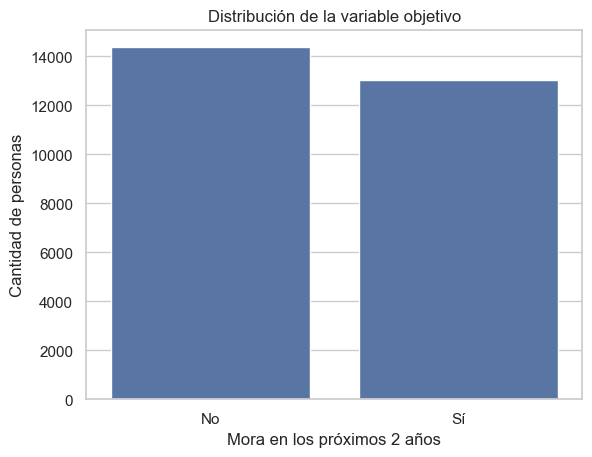

In [45]:
# 🔍 Distribución de la variable objetivo despues de eliminacion de valores extremos
target_counts = df["SeriousDlqin2yrs"].value_counts(normalize=True)
print("Distribución del target:")
print(target_counts)

sns.countplot(data=df, x="SeriousDlqin2yrs")
plt.title("Distribución de la variable objetivo")
plt.xlabel("Mora en los próximos 2 años")
plt.ylabel("Cantidad de personas")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

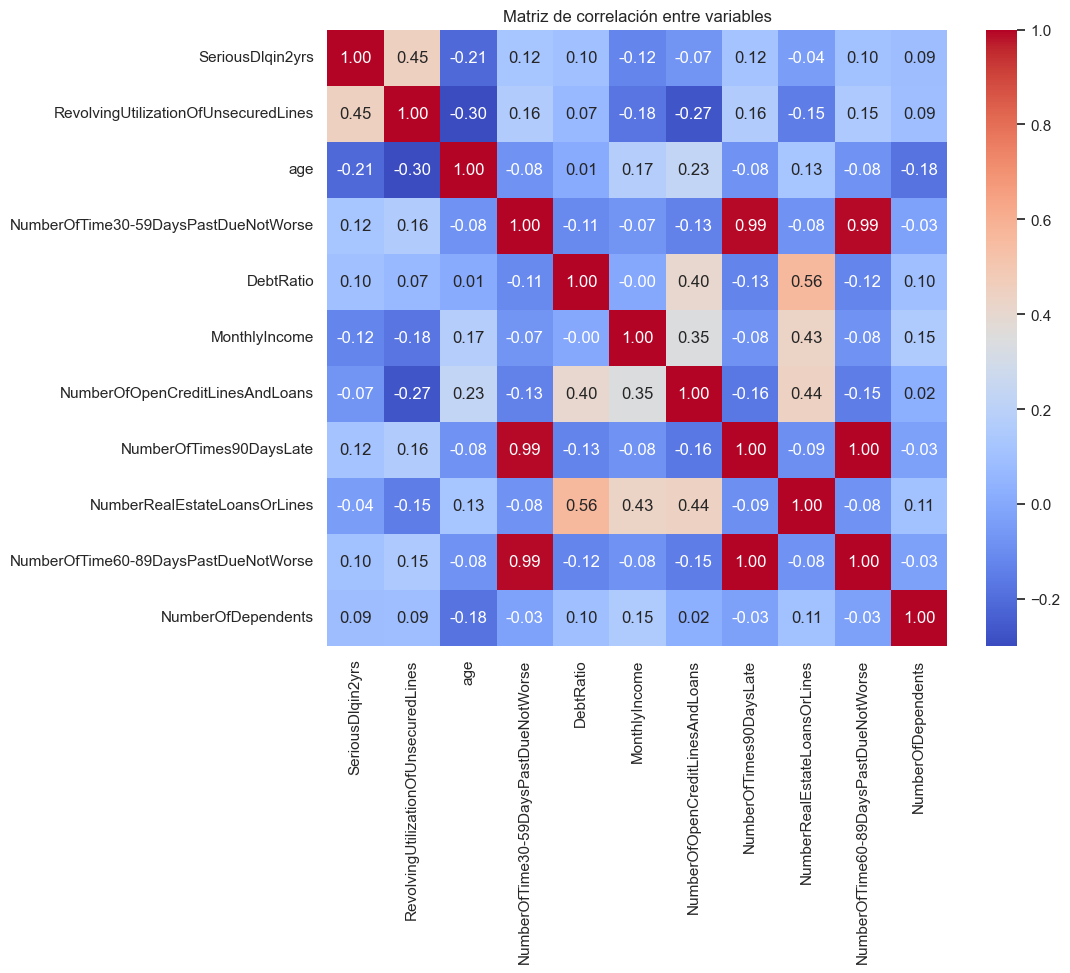

In [46]:
# 🔗 Mapa de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

In [ ]:
# 🧩 Comentarios
# - ¿Qué variables parecen más correlacionadas con la clase objetivo?

# R: luego de la eliminacion de valores extremos, la variable `RevolvingUtilizationOfUnsecuredLines` parece tener una 
# correlación de un 0.45 por lo que indicaria que a mayor utilizacion de credito, mayor probabilidad de morosidad.

# - ¿Hay variables que podrían necesitar transformación o escalamiento?

# R: al eliminar los outliers, las variables `RevolvingUtilizationOfUnsecuredLines` y `DebtRatio` ya no presentan valores extremos,
# por lo que no es necesario aplicar transformaciones adicionales. Pero si se deberia realizar un escalamiento de las variambles numéricas,
# como StandardScaler o MinMaxScaler, para que todas las variables tengan una escala similar y no afecten el rendimiento del modelo.

# - ¿Existe desbalance significativo?

# R: El preprocesamiento nos entrego un dataset con una distrucion casi perfecta entre ambas clases, pero al realizar la eliminacion de valores atipicos,
# y outliers, la clase positiva (morosos) se redujo sólo un 3% del total de registros, por lo que no se considera un desbalance significativo.

In [47]:
### 📊 Pregunta de reflexión
#Después del análisis exploratorio:
#
#- ¿Qué variable crees que será más relevante para predecir el default?

# R: Principalmente la variable `RevolvingUtilizationOfUnsecuredLines` parece ser la más relevante para poder predecir la Mora,
# ya que es la que tiene una mayor correlacion con la variable objetivo.  

#- ¿Alguna variable presenta un comportamiento que te parezca inesperado?

# R: Considerando los comentarios anteriores, la variable debtRatio presenta un comportamiento inesperado
# ya que se tiende a pensar que una persona con mayor deuda, tiene mas probabilidad de ser moroso.
# Otra variable podria ser `MonthlyIncome`, porque, si bien con un mayor ingreso hay menos probabilidad de ser moroso,
# no esta fuertemente correlacionada con seriousDlqin2yrs, lo que puede indicar que el ingreso no es un factor determinante en la morosidad.

In [48]:
df.to_csv("../data/credit_clean_wo_outliers.csv", index=False)